<a href="https://www.kaggle.com/code/altarnolutarkan/gdz-datathon-worksheet?scriptVersionId=129971027" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gdz-elektrik-datathon-2023/sample_submission.csv
/kaggle/input/gdz-elektrik-datathon-2023/med.csv
/kaggle/input/gdz-elektrik-datathon-2023/train.csv


In [2]:
med = pd.read_csv('/kaggle/input/gdz-elektrik-datathon-2023/med.csv')
data = pd.read_csv('/kaggle/input/gdz-elektrik-datathon-2023/train.csv')

In [3]:
data

,Tarih,Dağıtılan Enerji (MWh)
0,2018-01-01 00:00:00,1593.944216
1,2018-01-01 01:00:00,1513.933887
2,2018-01-01 02:00:00,1402.612637
3,2018-01-01 03:00:00,1278.527266
4,2018-01-01 04:00:00,1220.697701
...,...,...
40147,2022-07-31 19:00:00,2492.489498
40148,2022-07-31 20:00:00,2479.958245
40149,2022-07-31 21:00:00,2485.016884
40150,2022-07-31 22:00:00,2396.574255


In [4]:
resmi_tatiller = ['2018-01-01','2018-04-23','2018-05-01','2018-05-19','2018-08-30','2018-10-28','2018-10-29','2018-07-15','2018-06-14','2018-06-15','2018-06-16','2018-06-17','2018-08-20','2018-08-21','2018-08-22','2018-08-23','2018-08-24',
            '2019-01-01','2019-04-23','2019-05-01','2019-05-19','2019-08-30','2019-10-28','2019-10-29','2019-07-15','2019-06-04','2019-06-05','2019-06-06','2019-06-07','2019-08-10','2019-08-11','2019-08-12','2019-08-13','2019-08-14',
            '2020-01-01','2020-04-23','2020-05-01','2020-05-19','2020-08-30','2020-10-28','2020-10-29','2020-07-15','2020-05-23','2020-05-24','2020-05-25','2020-05-26','2020-07-30','2020-07-31','2020-08-01','2020-08-02','2020-08-03',
            '2021-01-01','2021-04-23','2021-05-01','2021-05-19','2021-08-30','2021-10-28','2021-10-29','2021-07-15','2021-05-12','2021-05-13','2021-05-14','2021-05-15','2021-07-19','2021-07-20','2021-07-21','2021-07-22','2021-07-23',
            '2022-01-01','2022-04-23','2022-05-01','2022-05-19','2022-08-30','2022-10-28','2022-10-29','2022-07-15','2022-05-02','2022-05-03','2022-05-04','2022-07-08','2022-07-09','2022-07-10','2022-07-11','2022-07-12']
resmi_tatiller = pd.DataFrame(resmi_tatiller)
resmi_tatiller = pd.to_datetime(resmi_tatiller[0])

In [5]:
med['Tarih'] = pd.to_datetime(med['Tarih'])
data['Tarih'] = pd.to_datetime(data['Tarih'],format='%Y-%m-%d %H')

In [6]:
data['Dağıtılan Enerji (MWh)'].describe()

count    40152.000000
mean      1836.805287
std        426.066085
min        870.183280
25%       1499.165048
50%       1813.409221
75%       2129.407998
max       3633.105297
Name: Dağıtılan Enerji (MWh), dtype: float64

**Med ve Normal Günler Kıyas**

In [7]:
#MED
data['Dağıtılan Enerji (MWh)'][data['Tarih'].dt.date.isin(med['Tarih'].dt.date)].describe()
#Veride med yani elektrik kesintisini kabul edilebilir süreyi aştığı günlerin enerji tüketim ortalaması normal günlerden daha yüksek??

count     720.000000
mean     1952.810079
std       487.662786
min      1082.986298
25%      1586.453171
50%      1961.547433
75%      2201.042662
max      3633.105297
Name: Dağıtılan Enerji (MWh), dtype: float64

In [8]:
#DİĞER
yedek = data.copy()
yedek['Dağıtılan Enerji (MWh)'][yedek['Tarih'].dt.date.isin(med['Tarih'].dt.date)] = np.nan
yedek.dropna(inplace=True)
yedek['Dağıtılan Enerji (MWh)'].describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


count    39432.000000
mean      1834.687123
std        424.570868
min        870.183280
25%       1497.658450
50%       1810.811233
75%       2127.028034
max       3628.119563
Name: Dağıtılan Enerji (MWh), dtype: float64

**Feature'ların Oluşturulması**

In [9]:
data.insert(0, "year", data['Tarih'].dt.year, True)
data.insert(1, "month", data['Tarih'].dt.month, True)
data.insert(2, "day", data['Tarih'].dt.day_name(), True)
data.insert(3, "monthday", data['Tarih'].dt.day, True)
data.insert(4, "yearday", data['Tarih'].dt.dayofyear, True)
data.insert(5, "hour", data['Tarih'].dt.hour, True)
data.insert(6,"seasons",data['Tarih'].dt.quarter,True)


data.loc[data['Tarih'].isin(resmi_tatiller),'day'] = 'Resmi Tatil'
data.loc[data['Tarih'].dt.date.isin(med['Tarih'].dt.date),'day']='MED'


#weekday={'Monday':1,'Tuesday':1,'Wednesday':1,'Thursday':1,'Friday':1,'Saturday':0,'Sunday':0}
#data.insert(6,"weekday",data['day'].map(weekday),True)

#data.drop('Tarih',axis=1,inplace=True)
data.head()

,year,month,day,monthday,yearday,hour,seasons,Tarih,Dağıtılan Enerji (MWh)
0,2018,1,Resmi Tatil,1,1,0,1,2018-01-01 00:00:00,1593.944216
1,2018,1,Monday,1,1,1,1,2018-01-01 01:00:00,1513.933887
2,2018,1,Monday,1,1,2,1,2018-01-01 02:00:00,1402.612637
3,2018,1,Monday,1,1,3,1,2018-01-01 03:00:00,1278.527266
4,2018,1,Monday,1,1,4,1,2018-01-01 04:00:00,1220.697701


**Verinin İncelenmesi**

<AxesSubplot:>

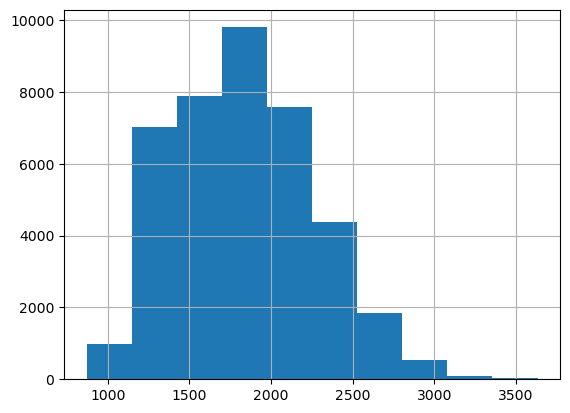

In [10]:
data['Dağıtılan Enerji (MWh)'].hist() #burada 3000 üstü ve 1000 altı değerler ne zaman gerçekleşmiş??

In [11]:
mask = data[data['Dağıtılan Enerji (MWh)']<1000]
mask[mask['day']=='Wednesday']
#burada enteresan birşey yok gibi, haftaiçi gece saatleri aktifliğin minimum olduğu saatler

,year,month,day,monthday,yearday,hour,seasons,Tarih,Dağıtılan Enerji (MWh)
11643,2019,5,Wednesday,1,121,3,2,2019-05-01 03:00:00,996.469560
11645,2019,5,Wednesday,1,121,5,2,2019-05-01 05:00:00,984.874769
12484,2019,6,Wednesday,5,156,4,2,2019-06-05 04:00:00,992.664042
12485,2019,6,Wednesday,5,156,5,2,2019-06-05 05:00:00,971.001812
12486,2019,6,Wednesday,5,156,6,2,2019-06-05 06:00:00,948.551853
12487,2019,6,Wednesday,5,156,7,2,2019-06-05 07:00:00,958.625421
21053,2020,5,Wednesday,27,148,5,2,2020-05-27 05:00:00,996.125317
21054,2020,5,Wednesday,27,148,6,2,2020-05-27 06:00:00,968.091704
38019,2022,5,Wednesday,4,124,3,2,2022-05-04 03:00:00,978.917460
38020,2022,5,Wednesday,4,124,4,2,2022-05-04 04:00:00,951.928627


In [12]:
mask = data[data['Dağıtılan Enerji (MWh)']>3000]
mask[(mask['day']=='Saturday') | (mask['day']=='Sunday')]
# 29-30-31 temmuz 2021 de izmir de büyük çaplı elektrik kesintisi oluyor onun ardından cihazların açılmasıyla
# artış olmuş olabilir fakat bu extremum değerler bütün hafta devam ediyor
# ayrıca 31 temmuz öğlen civarı izmir'de bir göktaşı haberi var fakat bu da bir hafta süren etkiyi açıklamaz.

,year,month,day,monthday,yearday,hour,seasons,Tarih,Dağıtılan Enerji (MWh)
31379,2021,7,Saturday,31,212,11,3,2021-07-31 11:00:00,3012.715736
31380,2021,7,Saturday,31,212,12,3,2021-07-31 12:00:00,3067.017895
31381,2021,7,Saturday,31,212,13,3,2021-07-31 13:00:00,3167.721691
31382,2021,7,Saturday,31,212,14,3,2021-07-31 14:00:00,3225.020874
31383,2021,7,Saturday,31,212,15,3,2021-07-31 15:00:00,3211.087356
31384,2021,7,Saturday,31,212,16,3,2021-07-31 16:00:00,3203.040563
31385,2021,7,Saturday,31,212,17,3,2021-07-31 17:00:00,3178.227172
31386,2021,7,Saturday,31,212,18,3,2021-07-31 18:00:00,3123.260542
31387,2021,7,Saturday,31,212,19,3,2021-07-31 19:00:00,3049.183617
31406,2021,8,Sunday,1,213,14,3,2021-08-01 14:00:00,3028.976143


<AxesSubplot:xlabel='Tarih'>

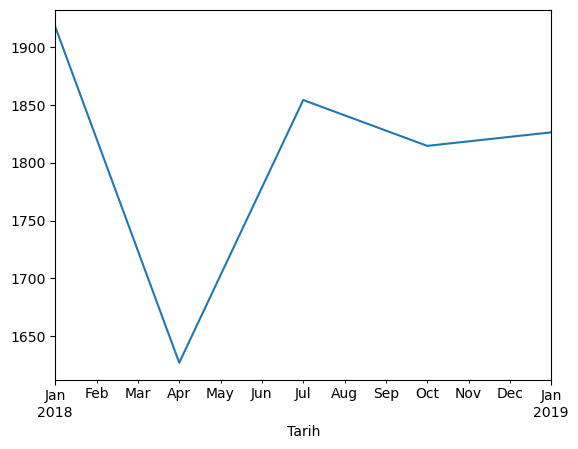

In [13]:
data.iloc[:8760,:].resample('3M',on='Tarih')['Dağıtılan Enerji (MWh)'].mean().plot()

<AxesSubplot:xlabel='year', ylabel='Dağıtılan Enerji (MWh)'>

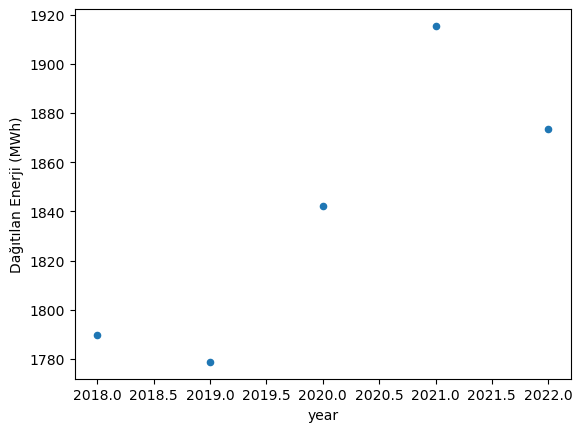

In [14]:
data.groupby('year').aggregate({'Dağıtılan Enerji (MWh)':'mean'}).reset_index().plot(kind='scatter',x='year',y='Dağıtılan Enerji (MWh)')

<AxesSubplot:xlabel='month'>

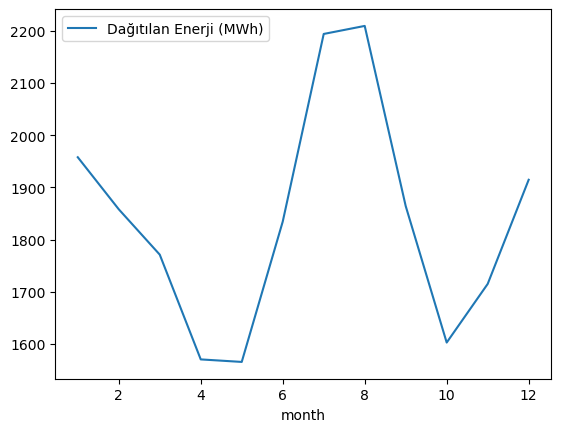

In [15]:
data.groupby('month').aggregate({'Dağıtılan Enerji (MWh)':'mean'}).plot()

<AxesSubplot:xlabel='day'>

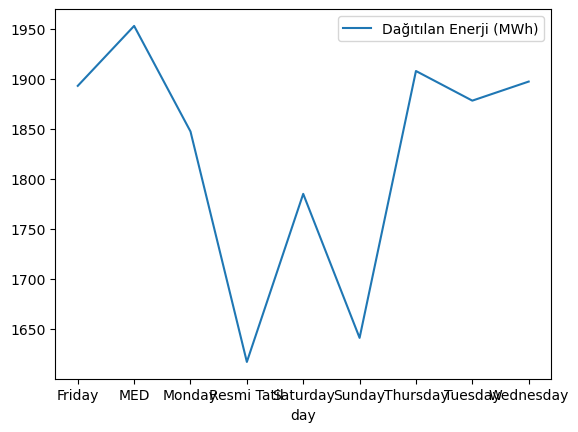

In [16]:
data.reset_index().groupby('day').aggregate({'Dağıtılan Enerji (MWh)':'mean'}).reset_index().plot(x='day',y='Dağıtılan Enerji (MWh)')

<AxesSubplot:xlabel='hour'>

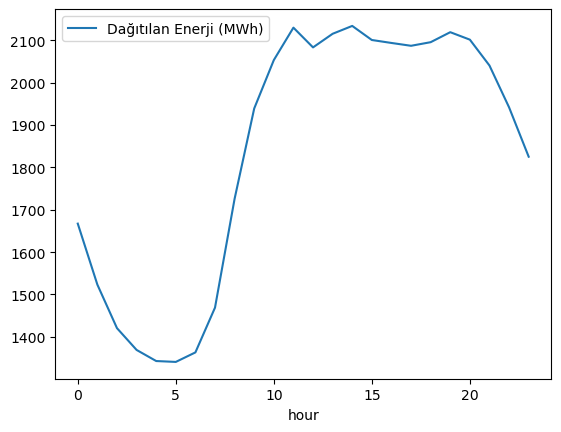

In [17]:
data.groupby('hour').aggregate({'Dağıtılan Enerji (MWh)':'mean'}).plot()

**Encoding**

In [18]:
days={} 
for c,i in enumerate(data['day'].unique()):
     days[i] = c

data['day'] = data['day'].map(days)        

In [19]:
data

,year,month,day,monthday,yearday,hour,seasons,Tarih,Dağıtılan Enerji (MWh)
0,2018,1,0,1,1,0,1,2018-01-01 00:00:00,1593.944216
1,2018,1,1,1,1,1,1,2018-01-01 01:00:00,1513.933887
2,2018,1,1,1,1,2,1,2018-01-01 02:00:00,1402.612637
3,2018,1,1,1,1,3,1,2018-01-01 03:00:00,1278.527266
4,2018,1,1,1,1,4,1,2018-01-01 04:00:00,1220.697701
...,...,...,...,...,...,...,...,...,...
40147,2022,7,7,31,212,19,3,2022-07-31 19:00:00,2492.489498
40148,2022,7,7,31,212,20,3,2022-07-31 20:00:00,2479.958245
40149,2022,7,7,31,212,21,3,2022-07-31 21:00:00,2485.016884
40150,2022,7,7,31,212,22,3,2022-07-31 22:00:00,2396.574255


In [20]:
data.drop('year',axis=1,inplace=True)
data.drop('Tarih',axis=1,inplace=True)


In [21]:
hour = data.groupby('hour')['Dağıtılan Enerji (MWh)'].mean()
hour = hour/hour.max() 
hour.to_dict()

day = data.groupby('day')['Dağıtılan Enerji (MWh)'].mean()
day = day/day.max()
day.to_dict()


monthday = data.groupby('monthday')['Dağıtılan Enerji (MWh)'].mean()
monthday = monthday/monthday.max()
monthday.to_dict()

yearday = data.groupby('yearday')['Dağıtılan Enerji (MWh)'].mean()
yearday = yearday/yearday.max()
yearday.to_dict()


month = data.groupby('month')['Dağıtılan Enerji (MWh)'].mean()
month = month/month.max()
month.to_dict()

seasons = data.groupby('seasons')['Dağıtılan Enerji (MWh)'].mean()
seasons = seasons/seasons.max()
seasons.to_dict()




{1: 0.8869879188270325, 2: 0.7884956239039251, 3: 1.0, 4: 0.8307343649106917}

In [22]:
data['hour'] = data['hour'].map(hour)

data['day'] = data['day'].map(day)

data['monthday'] = data['monthday'].map(monthday)

data['yearday'] = data['yearday'].map(yearday)

data['month'] = data['month'].map(month)

data['seasons'] = data['seasons'].map(seasons)


maxe=data['Dağıtılan Enerji (MWh)'].max()
data['Dağıtılan Enerji (MWh)'] = data['Dağıtılan Enerji (MWh)']/maxe
data

,month,day,monthday,yearday,hour,seasons,Dağıtılan Enerji (MWh)
0,0.886060,0.828110,0.960309,0.674590,0.781282,0.886988,0.438728
1,0.886060,0.945985,0.960309,0.674590,0.713798,0.886988,0.416705
2,0.886060,0.945985,0.960309,0.674590,0.665650,0.886988,0.386064
3,0.886060,0.945985,0.960309,0.674590,0.641551,0.886988,0.351910
4,0.886060,0.945985,0.960309,0.674590,0.629272,0.886988,0.335993
...,...,...,...,...,...,...,...
40147,0.993034,0.840412,1.000000,0.968369,0.993064,1.000000,0.686049
40148,0.993034,0.840412,1.000000,0.968369,0.984810,1.000000,0.682600
40149,0.993034,0.840412,1.000000,0.968369,0.956194,1.000000,0.683993
40150,0.993034,0.840412,1.000000,0.968369,0.909911,1.000000,0.659649


In [23]:
data.corr()

,month,day,monthday,yearday,hour,seasons,Dağıtılan Enerji (MWh)
month,1.000000e+00,0.000424,9.580258e-03,9.201597e-01,-1.178016e-15,8.014822e-01,0.485387
day,4.237330e-04,1.000000,2.666256e-03,2.664202e-02,2.809962e-03,-4.752100e-03,0.211046
monthday,9.580258e-03,0.002666,1.000000e+00,9.298463e-02,2.575646e-16,7.142821e-03,0.050783
yearday,9.201597e-01,0.026642,9.298463e-02,1.000000e+00,-1.097888e-15,7.388813e-01,0.526023
hour,-1.178016e-15,0.002810,2.575646e-16,-1.097888e-15,1.000000e+00,-1.633542e-15,0.713675
seasons,8.014822e-01,-0.004752,7.142821e-03,7.388813e-01,-1.633542e-15,1.000000e+00,0.389029
Dağıtılan Enerji (MWh),4.853866e-01,0.211046,5.078325e-02,5.260233e-01,7.136755e-01,3.890287e-01,1.000000


**Model**

In [24]:
import xgboost as xgb
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [25]:
X,y = data.iloc[:,:-1],data.iloc[:,-1]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 0)

In [27]:
xgb_regressor = xgb.XGBRegressor(eval_metric='mape',n_estimators=1000,learning_rate=0.3)
xgb_regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='mape', gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [28]:
predict = xgb_regressor.predict(X_test)

In [29]:
predict=predict*maxe
y_test=y_test*maxe
mean_absolute_error(y_test,predict)

38.16076233504535

In [30]:
index = [i for i in range(len(y_test))]
y_test = y_test.reset_index(drop=True)

cols={'predict':predict,'test':y_test}
results=pd.DataFrame(cols,index=index)

<AxesSubplot:>

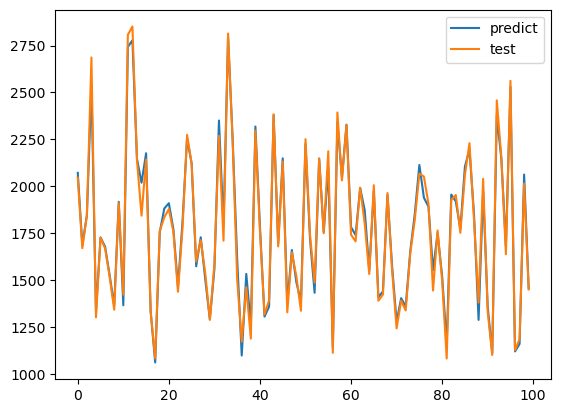

In [31]:
results.iloc[:100,:].plot()

In [32]:
sub = pd.read_csv('/kaggle/input/gdz-elektrik-datathon-2023/sample_submission.csv')

In [33]:
sub['Tarih'] = pd.to_datetime(sub['Tarih'],format='%Y-%m-%d %H')

sub.insert(0, "year", sub['Tarih'].dt.year, True)
sub.insert(1, "month", sub['Tarih'].dt.month, True)
sub.insert(2, "day", sub['Tarih'].dt.day_name(), True)
sub.insert(3, "monthday", sub['Tarih'].dt.day, True)
sub.insert(4, "yearday", sub['Tarih'].dt.dayofyear, True)
sub.insert(5, "hour", sub['Tarih'].dt.hour, True)
sub.insert(6,"seasons",sub['Tarih'].dt.quarter,True)

sub.loc[sub['Tarih'].isin(resmi_tatiller),'day'] = 'Resmi Tatil'
sub.loc[sub['Tarih'].dt.date.isin(med['Tarih'].dt.date),'day']='MED'



In [34]:
sub

,year,month,day,monthday,yearday,hour,seasons,Tarih,Dağıtılan Enerji (MWh)
0,2022,8,Monday,1,213,0,3,2022-08-01 00:00:00,0.0
1,2022,8,Monday,1,213,1,3,2022-08-01 01:00:00,0.0
2,2022,8,Monday,1,213,2,3,2022-08-01 02:00:00,0.0
3,2022,8,Monday,1,213,3,3,2022-08-01 03:00:00,0.0
4,2022,8,Monday,1,213,4,3,2022-08-01 04:00:00,0.0
...,...,...,...,...,...,...,...,...,...
739,2022,8,Wednesday,31,243,19,3,2022-08-31 19:00:00,0.0
740,2022,8,Wednesday,31,243,20,3,2022-08-31 20:00:00,0.0
741,2022,8,Wednesday,31,243,21,3,2022-08-31 21:00:00,0.0
742,2022,8,Wednesday,31,243,22,3,2022-08-31 22:00:00,0.0


In [35]:
days={} 
for c,i in enumerate(sub['day'].unique()):
     days[i] = c

sub['day'] = sub['day'].map(days)     

In [36]:
sub.drop('year',axis=1,inplace=True)
sub.drop('Tarih',axis=1,inplace=True)

In [37]:
sub['hour'] = sub['hour'].map(hour)

sub['day'] = sub['day'].map(day)

sub['monthday'] = sub['monthday'].map(monthday)

sub['yearday'] = sub['yearday'].map(yearday)

sub['month'] = sub['month'].map(month)

sub['seasons'] = sub['seasons'].map(seasons)

In [38]:
X=sub.iloc[:,0:-1]

In [39]:
X

,month,day,monthday,yearday,hour,seasons
0,1.0,0.828110,0.960309,0.954955,0.781282,1.0
1,1.0,0.828110,0.960309,0.954955,0.713798,1.0
2,1.0,0.828110,0.960309,0.954955,0.665650,1.0
3,1.0,0.828110,0.960309,0.954955,0.641551,1.0
4,1.0,0.828110,0.960309,0.954955,0.629272,1.0
...,...,...,...,...,...,...
739,1.0,0.961777,1.000000,0.871787,0.993064,1.0
740,1.0,0.961777,1.000000,0.871787,0.984810,1.0
741,1.0,0.961777,1.000000,0.871787,0.956194,1.0
742,1.0,0.961777,1.000000,0.871787,0.909911,1.0


In [40]:
predict = xgb_regressor.predict(X)
predict=predict*maxe

In [41]:
submission=pd.read_csv('/kaggle/input/gdz-elektrik-datathon-2023/sample_submission.csv',sep=',')
submission['Tarih'] = pd.to_datetime(submission['Tarih'])

In [42]:
submission['Dağıtılan Enerji (MWh)']=predict
#submission.rename(columns = {'Tarih':'Tarih','Dağıtılan Enerji (MWh)':'Dagitilan Enerji (MWh)'},inplace=True)

In [43]:
submission.to_csv('submission.csv',index=False,sep=",",decimal=".")

In [44]:
submission

,Tarih,Dağıtılan Enerji (MWh)
0,2022-08-01 00:00:00,2365.665039
1,2022-08-01 01:00:00,2254.267090
2,2022-08-01 02:00:00,2098.740234
3,2022-08-01 03:00:00,2029.341919
4,2022-08-01 04:00:00,1977.159302
...,...,...
739,2022-08-31 19:00:00,2599.230225
740,2022-08-31 20:00:00,2605.330566
741,2022-08-31 21:00:00,2506.193115
742,2022-08-31 22:00:00,2387.772949
